# Check simpleemulator interpolation accuracy
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 October 2023
- Last verification : October 24th 2023

===================================================================================

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib import gridspec
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from simpleemulator.simpleatmemulator import SimpleAtmEmulator,find_data_path,final_path_data
from simpleemulator.simpleatmemulator import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
List_Of_All_sites = list(Dict_Of_sitesPressures.keys()) 
List_Of_All_sites 

['LSST', 'CTIO', 'OHP', 'PDM', 'OMK', 'OSL']

# Configuration

In [7]:
textboxstr = '\n'.join((
    r'simple atmospheric emulator' ,
    r'libradtran grid'))
textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

In [8]:
site = 'LSST'
#path = find_data_path()
path = final_path_data
emul  = SimpleAtmEmulator(obs_str=site)

Observatory LSST found in preselected observation sites


### Wavelengths

In [9]:
# Same wavelength grid for training and test datasets
WL = emul.GetWL()

### Airmasses

- in test samples

In [10]:
AIRMASSMIN = emul.AIRMASSMIN_test
AIRMASSMAX= emul.AIRMASSMAX_test
DAM = emul.DAIRMASS_test
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [11]:
NAM = len(airmasses)
sequential_colors = sns.color_palette("hls", NAM)

# Accuracy tests

## Rayleigh Interpolation accuracy

### transmissions

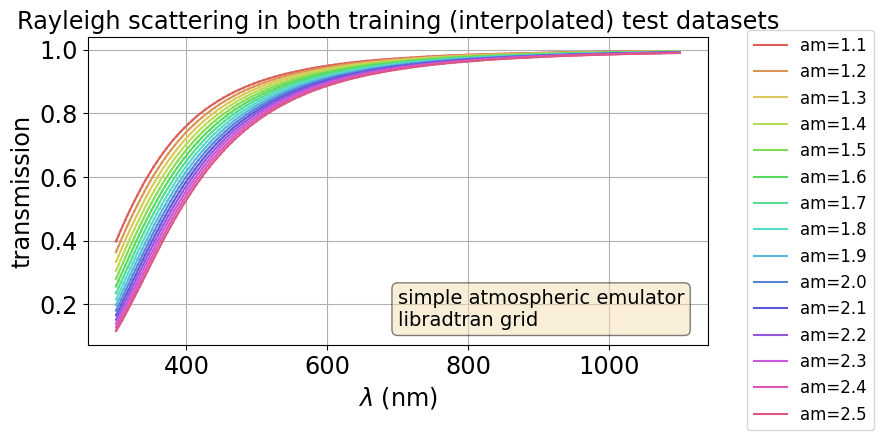

In [12]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    transm_training = emul.GetRayleighTransparencyArray(WL,am)
    transm_test = emul.data_rayleigh_test[:,idx]
    label = f"am={am:.1f}"
    ax.plot(WL,transm_training,":",color=sequential_colors[idx])
    ax.plot(WL,transm_test,"-",color=sequential_colors[idx],label=label)
ax.legend(bbox_to_anchor=(1.05, 1.05))
ax.set_title("Rayleigh scattering in both training (interpolated) test datasets")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()

### biases

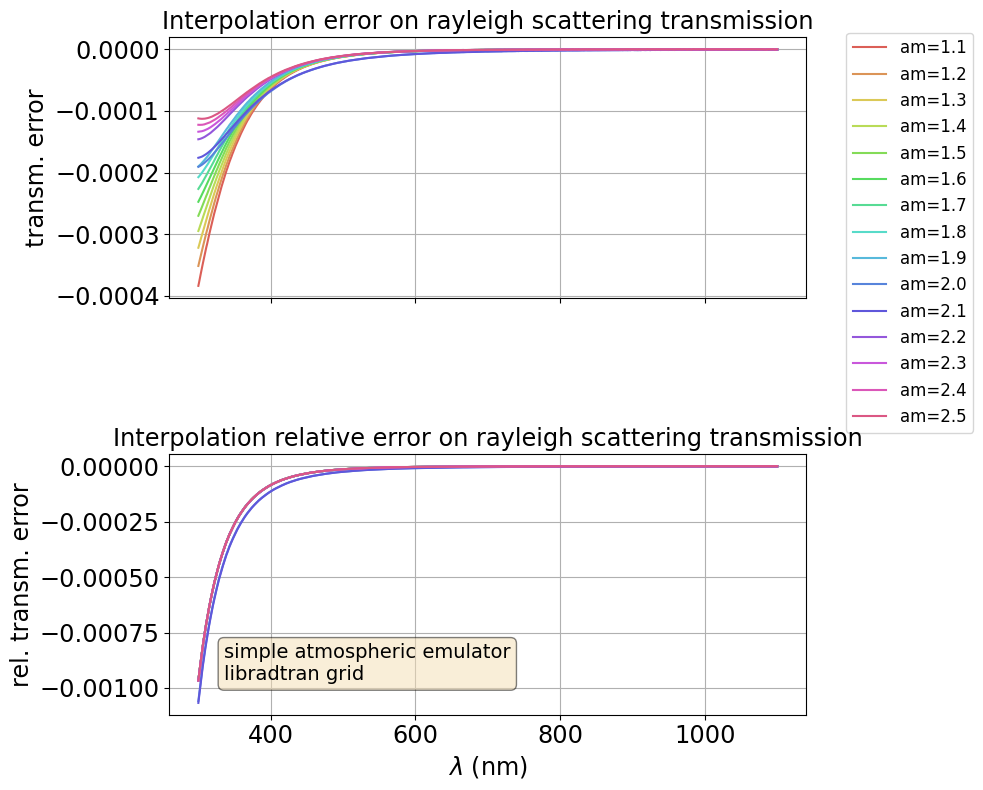

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8),sharex=True)

# no secondary axis https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html
#secax1 = ax1.secondary_xaxis('top')
#secax2 = ax2.secondary_xaxis('top')
for idx,am in enumerate(airmasses):
    transm_training = emul.GetRayleighTransparencyArray(WL,am)
    transm_test = emul.data_rayleigh_test[:,idx]
    
    label = f"am={am:.1f}"
    
    #fig1
    ax1.plot(WL,transm_test-transm_training,"-",color=sequential_colors[idx],label=label)
    
    #fig2
    ax2.plot(WL,(transm_test-transm_training)/transm_test,"k-",color=sequential_colors[idx])
    
# general     
ax1.legend(bbox_to_anchor=(1.05, 1.05))    
ax1.set_title("Interpolation error on rayleigh scattering transmission")
ax2.set_title("Interpolation relative error on rayleigh scattering transmission")
ax1.grid()
ax2.grid()
ax1.set_ylabel("transm. error")
ax2.set_ylabel("rel. transm. error")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.text(0.2, 0.2, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
plt.tight_layout()

# O2 Interpolation accuracy

### Transmissions

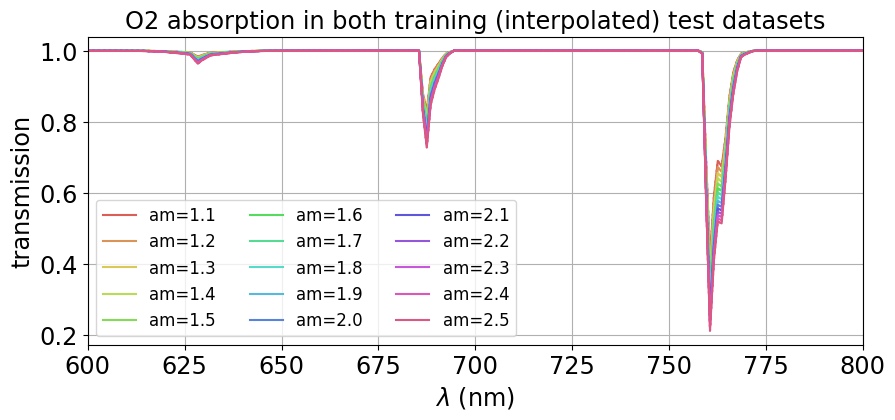

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
for idx,am in enumerate(airmasses):
    transm_training = emul.GetO2absTransparencyArray(WL,am)
    transm_test = emul.data_O2abs_test[:,idx]
    label = f"am={am:.1f}"
    ax.plot(WL,transm_training,":",color=sequential_colors[idx])
    ax.plot(WL,transm_test,"-",color=sequential_colors[idx],label=label)
ax.legend(loc="lower left",ncol=3)
ax.set_title("O2 absorption in both training (interpolated) test datasets")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,800.)
ax.grid()

### Biases

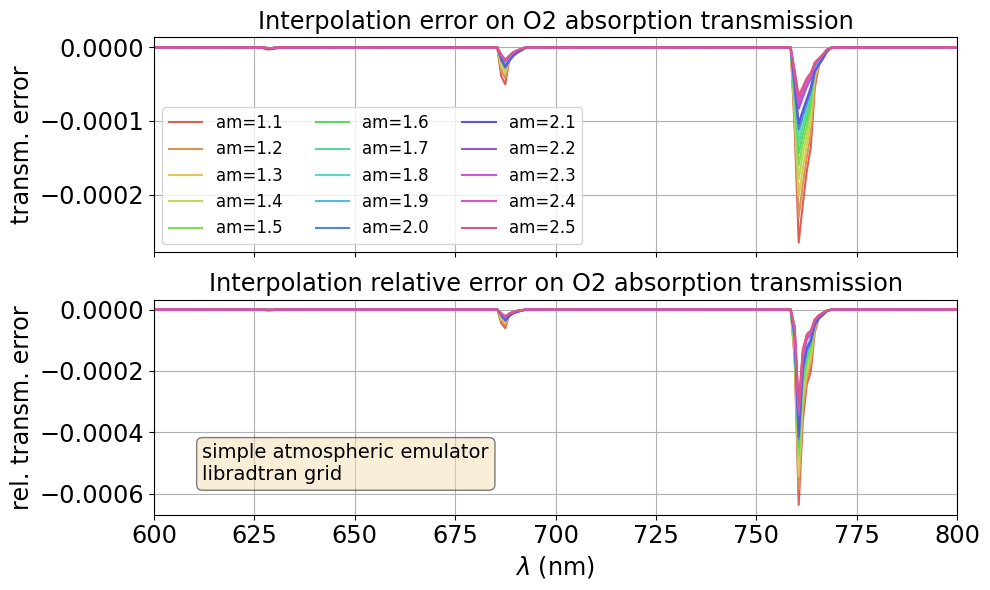

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6),sharex=True)

# no secondary axis https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html
#secax1 = ax1.secondary_xaxis('top')
#secax2 = ax2.secondary_xaxis('top')
for idx,am in enumerate(airmasses):
    transm_training = emul.GetO2absTransparencyArray(WL,am)
    transm_test = emul.data_O2abs_test[:,idx]
    
    label = f"am={am:.1f}"
    
    #fig1
    ax1.plot(WL,transm_test-transm_training,"-",color=sequential_colors[idx],label=label)
    
    #fig2
    ax2.plot(WL,(transm_test-transm_training)/transm_test,"k-",color=sequential_colors[idx])
    
# general     
ax1.legend(loc="lower left",ncol=3)    
ax1.set_title("Interpolation error on O2 absorption transmission")
ax2.set_title("Interpolation relative error on O2 absorption transmission")
ax1.grid()
ax2.grid()
ax1.set_ylabel("transm. error")
ax2.set_ylabel("rel. transm. error")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.text(0.1, 0.2, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.set_xlim(600.,800.)
plt.tight_layout()

## PWV Interpolation accuracy

In [16]:
airmasses

array([1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05,
       2.15, 2.25, 2.35, 2.45])

In [17]:
PWVMIN = emul.PWVMIN_test
PWVMAX= emul.PWVMAX_test
DPWV = emul.DPWV_test
all_pwv = np.arange(PWVMIN,PWVMAX,DPWV)

In [18]:
all_pwv

array([ 0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,  1.875,
        2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,  3.875,
        4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,  5.875,
        6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,  7.875,
        8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,  9.875,
       10.125, 10.375, 10.625])

In [19]:
NPWV = len(all_pwv)
sequential_colors = sns.color_palette("hls", NPWV)

### Transmission

Choose the index of the airmass

In [20]:
idx_am = 0
am = airmasses[idx_am]

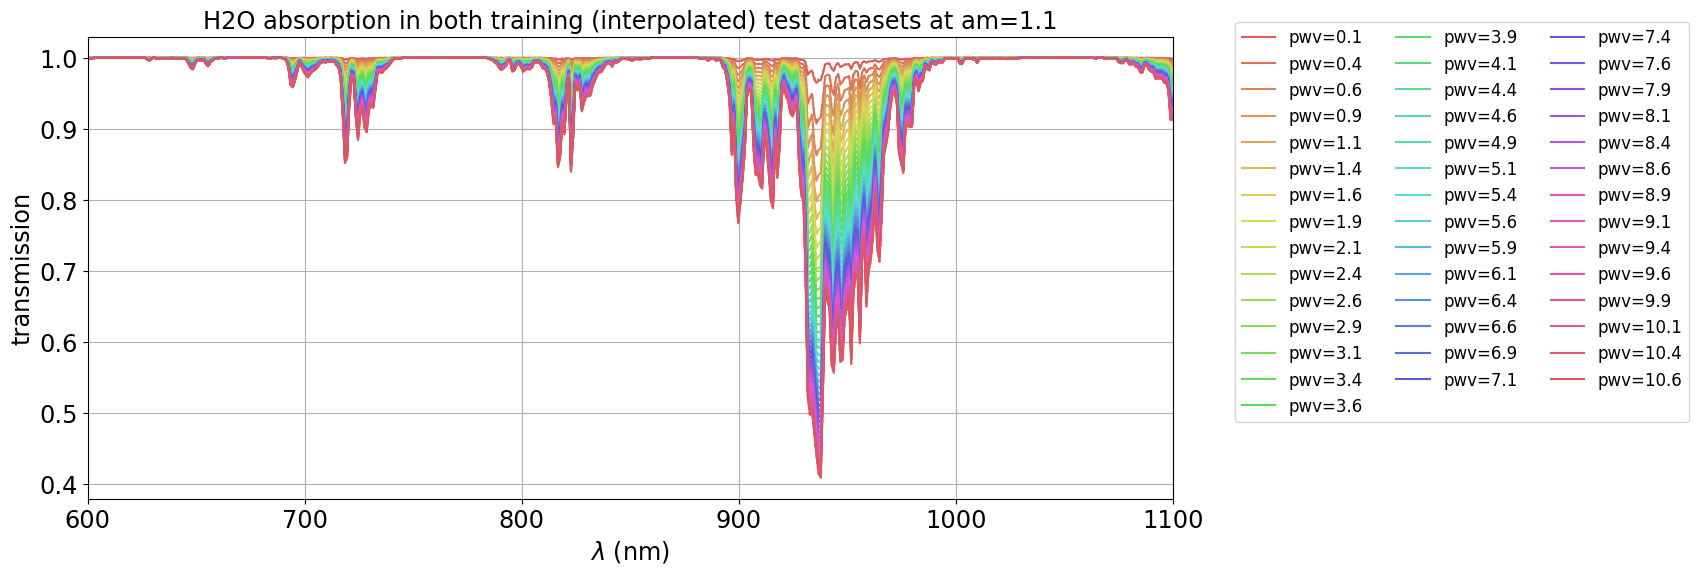

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
for idx,pwv in enumerate(all_pwv):
    transm_training = emul.GetPWVabsTransparencyArray(WL,am,pwv)
    transm_test = emul.data_PWVabs_test[:,idx_am,idx]
    label = f"pwv={pwv:.1f}"
    ax.plot(WL,transm_training,":",color=sequential_colors[idx])
    ax.plot(WL,transm_test,"-",color=sequential_colors[idx],label=label)
ax.legend(bbox_to_anchor=(1.05, 1.05),ncol=3)
title = f"H2O absorption in both training (interpolated) test datasets at am={am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,1100.)
ax.grid()

### Biases

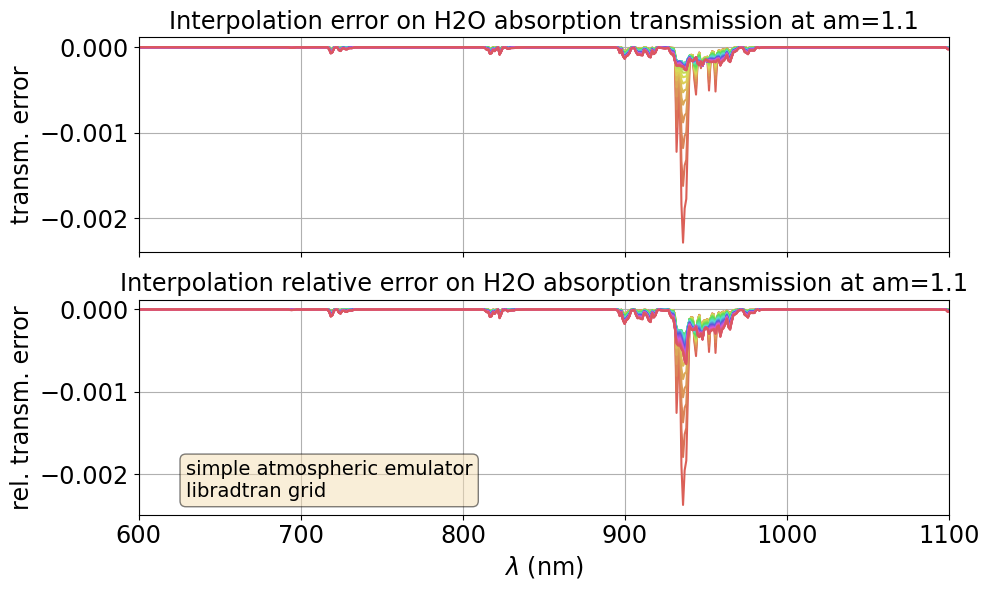

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6),sharex=True)

# no secondary axis https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html
#secax1 = ax1.secondary_xaxis('top')
#secax2 = ax2.secondary_xaxis('top')
for idx,pwv in enumerate(all_pwv):
    transm_training = emul.GetPWVabsTransparencyArray(WL,am,pwv)
    transm_test = emul.data_PWVabs_test[:,idx_am,idx]
    
    label = f"pwv={pwv:.1f}"
    
    #fig1
    ax1.plot(WL,transm_test-transm_training,"-",color=sequential_colors[idx],label=label)
    
    #fig2
    ax2.plot(WL,(transm_test-transm_training)/transm_test,"k-",color=sequential_colors[idx])
    
# general     
#ax1.legend(loc="lower left",ncol=3)    
#ax1.legend(bbox_to_anchor=(1.05, 1.05),ncol=2)
title1 = f"Interpolation error on H2O absorption transmission at am={am:.1f}"
title2 = f"Interpolation relative error on H2O absorption transmission at am={am:.1f}"
ax1.set_title(title1)
ax2.set_title(title2)
ax1.grid()
ax2.grid()
ax1.set_ylabel("transm. error")
ax2.set_ylabel("rel. transm. error")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.text(0.01, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.set_xlim(600.,1100.)
plt.tight_layout()

## Ozon Interpolation accuracy

In [23]:
OZMIN = emul.OZMIN_test
OZMAX= emul.OZMAX_test
DOZ = emul.DOZ_test
all_oz = np.arange(OZMIN,OZMAX,DOZ)

In [24]:
NOZ = len(all_oz)
sequential_colors = sns.color_palette("hls", NOZ)

### Transmission

In [25]:
idx_am = 0
am = airmasses[idx_am]

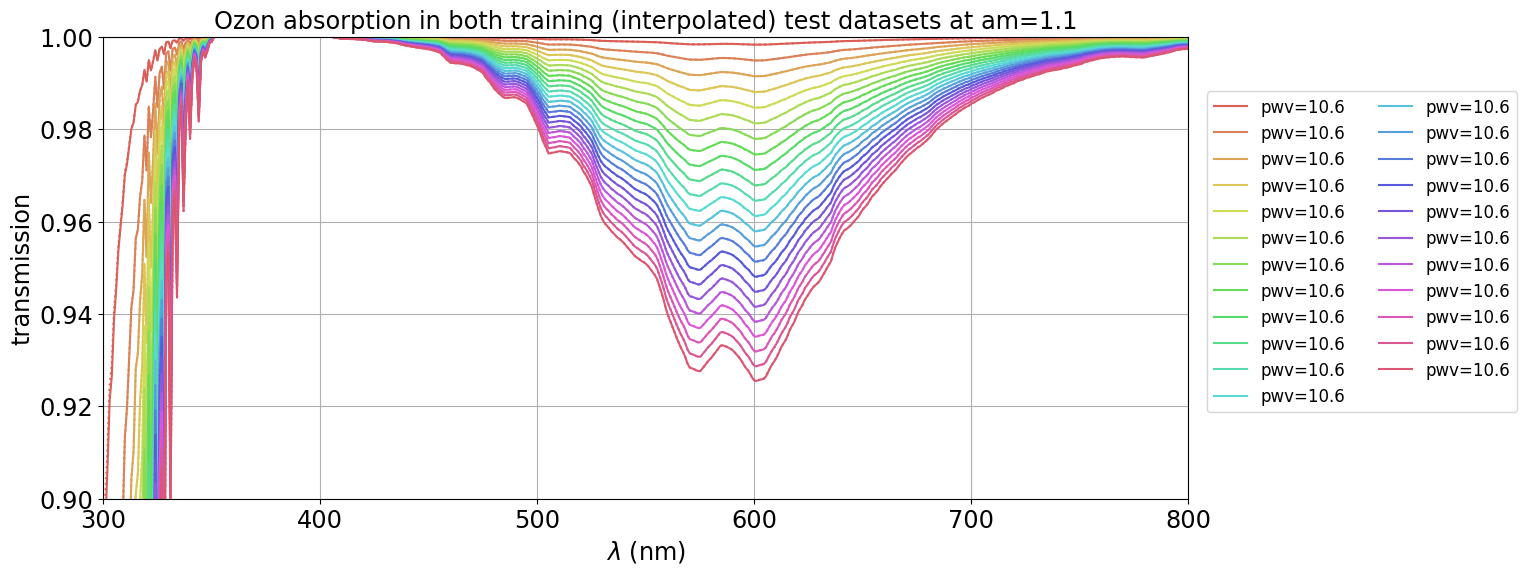

In [26]:
fig, ax = plt.subplots(figsize=(14,6))
for idx,oz in enumerate(all_oz):
    transm_training = emul.GetOZabsTransparencyArray(WL,am,oz)
    transm_test = emul.data_OZabs_test[:,idx_am,idx]
    label = f"pwv={pwv:.1f}"
    ax.plot(WL,transm_training,":",color=sequential_colors[idx])
    ax.plot(WL,transm_test,"-",color=sequential_colors[idx],label=label)
ax.legend(bbox_to_anchor=(1.01, 0.9),ncol=2)
title = f"Ozon absorption in both training (interpolated) test datasets at am={am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1)
ax.grid()

### Biases

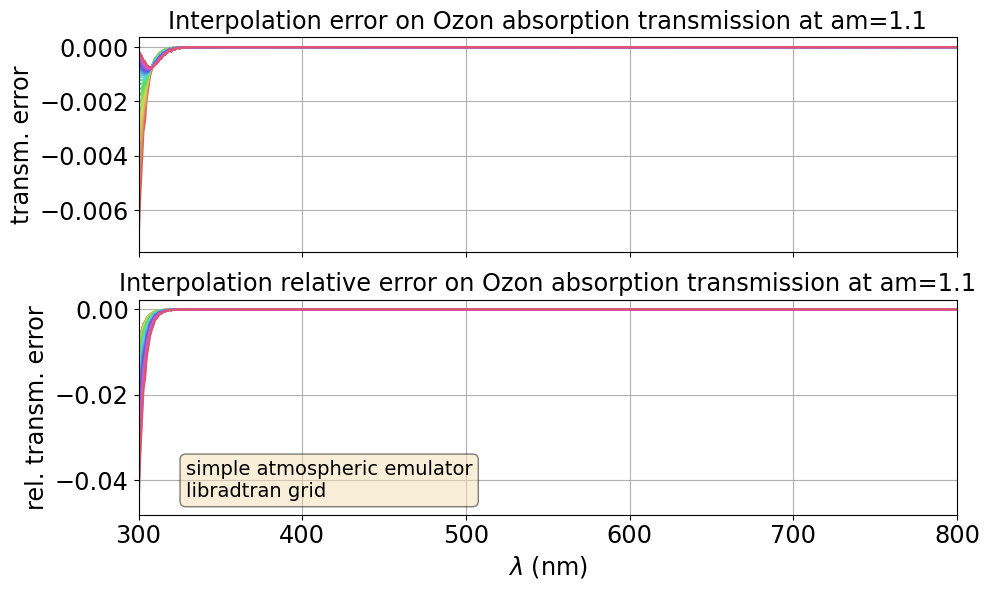

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6),sharex=True)

# no secondary axis https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html
#secax1 = ax1.secondary_xaxis('top')
#secax2 = ax2.secondary_xaxis('top')
for idx,oz in enumerate(all_oz):
    transm_training = emul.GetOZabsTransparencyArray(WL,am,oz)
    transm_test = emul.data_OZabs_test[:,idx_am,idx]
    
    label = f"oz={oz:.1f}"
    
    #fig1
    ax1.plot(WL,transm_test-transm_training,"-",color=sequential_colors[idx],label=label)
    
    #fig2
    ax2.plot(WL,(transm_test-transm_training)/transm_test,"k-",color=sequential_colors[idx])
    
# general     
#ax1.legend(loc="lower left",ncol=3)    
#ax1.legend(bbox_to_anchor=(1.05, 1.05),ncol=2)
title1 = f"Interpolation error on Ozon absorption transmission at am={am:.1f}"
title2 = f"Interpolation relative error on Ozon absorption transmission at am={am:.1f}"
ax1.set_title(title1)
ax2.set_title(title2)
ax1.grid()
ax2.grid()
ax1.set_ylabel("transm. error")
ax2.set_ylabel("rel. transm. error")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.text(0.01, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.set_xlim(300.,800.)
plt.tight_layout()